<a href="https://colab.research.google.com/github/ronan777/HydroProc/blob/main/SyntheticsHydro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read_inventory
from obspy import read
import obspy.core.stream as st
import obspy.signal.cross_correlation as cc
import obspy.signal.filter as flt
import obspy.signal.trigger as trg
import obspy.signal.freqattributes as frq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import gc


✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



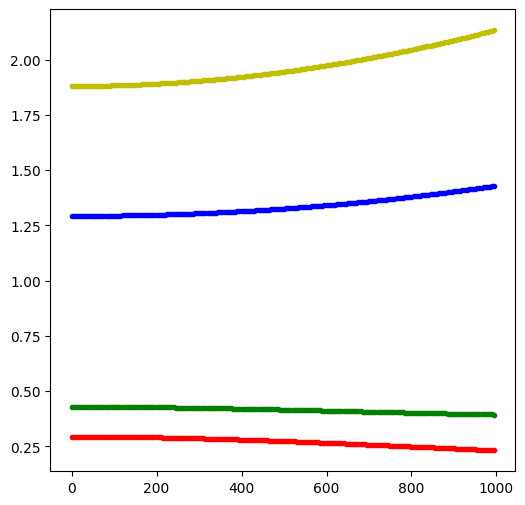

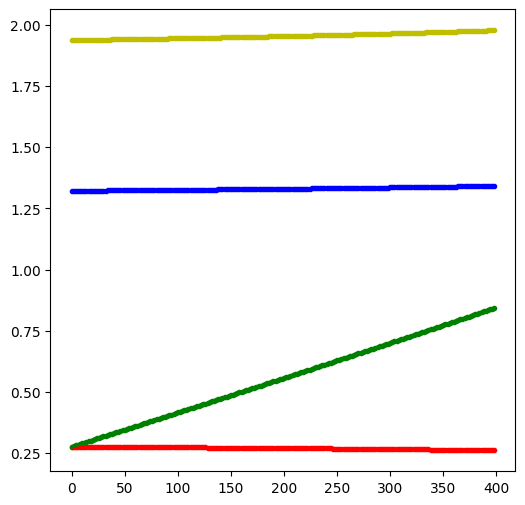

In [9]:
#
#
#
#
# Define functions to be used by several modules to model relection times
#
def ReflectionsTimes(Bath, Whale, Sensor, Offset, Wvel):
  theta = math.atan(Offset/(2.*Bath-Sensor-Whale))
  if (Offset == 0):
    diff1 = (2*Bath-Sensor-Whale)/math.cos(theta) - Bath + Whale
    diff4 = (4*Bath-Sensor-Whale)/math.cos(theta) - Bath + Whale
    diff3 = (2*Bath+Sensor-Whale)/math.cos(theta) - Bath + Whale
    diff2 = (2*Bath-Sensor+Whale)/math.cos(theta) - Bath + Whale
  else :
    alpha = math.atan((Bath-Whale)/Offset)
    diff1 = (2*Bath-Sensor-Whale)/math.cos(theta) - Offset/math.cos(alpha)
    diff4 = (4*Bath-Sensor-Whale)/math.cos(theta) - Offset/math.cos(alpha)
    diff3 = (2*Bath+Sensor-Whale)/math.cos(theta) - Offset/math.cos(alpha)
    diff2 = (2*Bath-Sensor+Whale)/math.cos(theta) - Offset/math.cos(alpha)
  dt1 = diff1/Wvel
  dt2 = diff2/Wvel
  dt3 = diff3/Wvel
  dt4 = diff4/Wvel
  return dt1, dt2, dt3, dt4
#
#
Bath = 1174
Sensor = 739
Whale = 100
hvel = 1480
fig, ax = plt.subplots(figsize=(6, 6), )
for i in range(200):
  Offset = i*5
  dt1, dt2, dt3, dt4 = ReflectionsTimes(Bath, Whale, Sensor, Offset, hvel)
#  print(Offset, dt1, dt2)
  plt.plot(Offset,dt1,'r.', Offset,dt2,'g.',Offset,dt3,'b.', Offset,dt4,'y.')
plt.show()
fig, ax = plt.subplots(figsize=(6, 6), )
for i in range(200):
  Offset = 500
  Whale = i*2.
  dt1, dt2, dt3, dt4 = ReflectionsTimes(Bath, Whale, Sensor, Offset, hvel)
#  print(Whale, dt1, dt2)
  plt.plot(Whale,dt1,'r.', Whale,dt2,'g.',Whale,dt3,'b.', Whale,dt4,'y.')
plt.show()



[link text](https://)